# Extracting Stock Data Using a Web Scraping

In [1]:
# Import Required Libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define url And Send Request | Apple Revenue
url = 'https://www.macrotrends.net/stocks/charts/AAPL/apple/revenue'
html_data = requests.get(url).text

In [3]:
# Parse the Web Page with BeautifulSoup
soup = BeautifulSoup(html_data,'html.parser')

In [4]:
# Locate the Table Containing Financial Data
tables = soup.find_all('table')

In [5]:
len(tables)

0

No tables found?

If `len(tables)` returns 0, it’s likely because the page loads its data using JavaScript, and `requests.get()` only fetches the raw HTML — not the JavaScript-generated content.

` Try this instead:`

Use `pandas.read_html()` — it sometimes works even when BeautifulSoup doesn’t

If that fails, you can either:

Use Selenium to render the page like a browser, or

Manually inspect and copy the <table> HTML from the site and load it locally.


In [7]:
import pandas as pd

dfs = pd.read_html(url)
print(len(dfs))


HTTPError: HTTP Error 403: Forbidden

## ⚠️ Fixing HTTP Error 403: Forbidden

The website blocked my request because `pandas.read_html()` uses a basic HTTP client that lacks a user-agent header.

To bypass this, i add a `User-Agent` header to my request — this tricks the site into thinking we're a real browser.

In [11]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

print(response.status_code)



403


403 :(
  ❓ What does this mean?
This means that all the traditional methods like requests, pandas.read_html(), and BeautifulSoup will not work unless:

✅ I use advanced tools like Selenium or Playwright
(which simulate a real browser and execute JavaScript to load dynamic content).

✅ Or, simply use a saved version of the data or copy it manually.
(This approach is useful in learning environments where the main goal is to practice data extraction and analysis.)

I will choose => Or, simply... :)

---

The table, how can I bring it manually from the site, if all scraping methods failed?

=> Inspect: Quarterly Revenue Table


In [12]:
from io import StringIO


In [13]:
html = """<table class="historical_data_table table">
				<thead>
				  <tr>
					<th colspan="2" style="text-align:center">Apple Quarterly Revenue<br><span style="font-size:14px;">(Millions of US $)</span></th>
				  </tr>
				</thead>
				<tbody>


					<tr>
						<td style="text-align:center">2025-03-31</td>




															<td style="text-align:center">$95,359</td>


											</tr>


					<tr>
						<td style="text-align:center">2024-12-31</td>




															<td style="text-align:center">$124,300</td>


											</tr>


					<tr>
						<td style="text-align:center">2024-09-30</td>




															<td style="text-align:center">$94,930</td>


											</tr>


					<tr>
						<td style="text-align:center">2024-06-30</td>




															<td style="text-align:center">$85,777</td>


											</tr>


					<tr>
						<td style="text-align:center">2024-03-31</td>




															<td style="text-align:center">$90,753</td>


											</tr>


					<tr>
						<td style="text-align:center">2023-12-31</td>




															<td style="text-align:center">$119,575</td>


											</tr>


					<tr>
						<td style="text-align:center">2023-09-30</td>




															<td style="text-align:center">$89,498</td>


											</tr>


					<tr>
						<td style="text-align:center">2023-06-30</td>




															<td style="text-align:center">$81,797</td>


											</tr>


					<tr>
						<td style="text-align:center">2023-03-31</td>




															<td style="text-align:center">$94,836</td>


											</tr>


					<tr>
						<td style="text-align:center">2022-12-31</td>




															<td style="text-align:center">$117,154</td>


											</tr>


					<tr>
						<td style="text-align:center">2022-09-30</td>




															<td style="text-align:center">$90,146</td>


											</tr>


					<tr>
						<td style="text-align:center">2022-06-30</td>




															<td style="text-align:center">$82,959</td>


											</tr>


					<tr>
						<td style="text-align:center">2022-03-31</td>




															<td style="text-align:center">$97,278</td>


											</tr>


					<tr>
						<td style="text-align:center">2021-12-31</td>




															<td style="text-align:center">$123,945</td>


											</tr>


					<tr>
						<td style="text-align:center">2021-09-30</td>




															<td style="text-align:center">$83,360</td>


											</tr>


					<tr>
						<td style="text-align:center">2021-06-30</td>




															<td style="text-align:center">$81,434</td>


											</tr>


					<tr>
						<td style="text-align:center">2021-03-31</td>




															<td style="text-align:center">$89,584</td>


											</tr>


					<tr>
						<td style="text-align:center">2020-12-31</td>




															<td style="text-align:center">$111,439</td>


											</tr>


					<tr>
						<td style="text-align:center">2020-09-30</td>




															<td style="text-align:center">$64,698</td>


											</tr>


					<tr>
						<td style="text-align:center">2020-06-30</td>




															<td style="text-align:center">$59,685</td>


											</tr>


					<tr>
						<td style="text-align:center">2020-03-31</td>




															<td style="text-align:center">$58,313</td>


											</tr>


					<tr>
						<td style="text-align:center">2019-12-31</td>




															<td style="text-align:center">$91,819</td>


											</tr>


					<tr>
						<td style="text-align:center">2019-09-30</td>




															<td style="text-align:center">$64,040</td>


											</tr>


					<tr>
						<td style="text-align:center">2019-06-30</td>




															<td style="text-align:center">$53,809</td>


											</tr>


					<tr>
						<td style="text-align:center">2019-03-31</td>




															<td style="text-align:center">$58,015</td>


											</tr>


					<tr>
						<td style="text-align:center">2018-12-31</td>




															<td style="text-align:center">$84,310</td>


											</tr>


					<tr>
						<td style="text-align:center">2018-09-30</td>




															<td style="text-align:center">$62,900</td>


											</tr>


					<tr>
						<td style="text-align:center">2018-06-30</td>




															<td style="text-align:center">$53,265</td>


											</tr>


					<tr>
						<td style="text-align:center">2018-03-31</td>




															<td style="text-align:center">$61,137</td>


											</tr>


					<tr>
						<td style="text-align:center">2017-12-31</td>




															<td style="text-align:center">$88,293</td>


											</tr>


					<tr>
						<td style="text-align:center">2017-09-30</td>




															<td style="text-align:center">$52,579</td>


											</tr>


					<tr>
						<td style="text-align:center">2017-06-30</td>




															<td style="text-align:center">$45,408</td>


											</tr>


					<tr>
						<td style="text-align:center">2017-03-31</td>




															<td style="text-align:center">$52,896</td>


											</tr>


					<tr>
						<td style="text-align:center">2016-12-31</td>




															<td style="text-align:center">$78,351</td>


											</tr>


					<tr>
						<td style="text-align:center">2016-09-30</td>




															<td style="text-align:center">$46,852</td>


											</tr>


					<tr>
						<td style="text-align:center">2016-06-30</td>




															<td style="text-align:center">$42,358</td>


											</tr>


					<tr>
						<td style="text-align:center">2016-03-31</td>




															<td style="text-align:center">$50,557</td>


											</tr>


					<tr>
						<td style="text-align:center">2015-12-31</td>




															<td style="text-align:center">$75,872</td>


											</tr>


					<tr>
						<td style="text-align:center">2015-09-30</td>




															<td style="text-align:center">$51,501</td>


											</tr>


					<tr>
						<td style="text-align:center">2015-06-30</td>




															<td style="text-align:center">$49,605</td>


											</tr>


					<tr>
						<td style="text-align:center">2015-03-31</td>




															<td style="text-align:center">$58,010</td>


											</tr>


					<tr>
						<td style="text-align:center">2014-12-31</td>




															<td style="text-align:center">$74,599</td>


											</tr>


					<tr>
						<td style="text-align:center">2014-09-30</td>




															<td style="text-align:center">$42,123</td>


											</tr>


					<tr>
						<td style="text-align:center">2014-06-30</td>




															<td style="text-align:center">$37,432</td>


											</tr>


					<tr>
						<td style="text-align:center">2014-03-31</td>




															<td style="text-align:center">$45,646</td>


											</tr>


					<tr>
						<td style="text-align:center">2013-12-31</td>




															<td style="text-align:center">$57,594</td>


											</tr>


					<tr>
						<td style="text-align:center">2013-09-30</td>




															<td style="text-align:center">$37,472</td>


											</tr>


					<tr>
						<td style="text-align:center">2013-06-30</td>




															<td style="text-align:center">$35,323</td>


											</tr>


					<tr>
						<td style="text-align:center">2013-03-31</td>




															<td style="text-align:center">$43,603</td>


											</tr>


					<tr>
						<td style="text-align:center">2012-12-31</td>




															<td style="text-align:center">$54,512</td>


											</tr>


					<tr>
						<td style="text-align:center">2012-09-30</td>




															<td style="text-align:center">$35,966</td>


											</tr>


					<tr>
						<td style="text-align:center">2012-06-30</td>




															<td style="text-align:center">$35,023</td>


											</tr>


					<tr>
						<td style="text-align:center">2012-03-31</td>




															<td style="text-align:center">$39,186</td>


											</tr>


					<tr>
						<td style="text-align:center">2011-12-31</td>




															<td style="text-align:center">$46,333</td>


											</tr>


					<tr>
						<td style="text-align:center">2011-09-30</td>




															<td style="text-align:center">$28,270</td>


											</tr>


					<tr>
						<td style="text-align:center">2011-06-30</td>




															<td style="text-align:center">$28,571</td>


											</tr>


					<tr>
						<td style="text-align:center">2011-03-31</td>




															<td style="text-align:center">$24,667</td>


											</tr>


					<tr>
						<td style="text-align:center">2010-12-31</td>




															<td style="text-align:center">$26,741</td>


											</tr>


					<tr>
						<td style="text-align:center">2010-09-30</td>




															<td style="text-align:center">$20,343</td>


											</tr>


					<tr>
						<td style="text-align:center">2010-06-30</td>




															<td style="text-align:center">$15,700</td>


											</tr>


					<tr>
						<td style="text-align:center">2010-03-31</td>




															<td style="text-align:center">$13,499</td>


											</tr>


					<tr>
						<td style="text-align:center">2009-12-31</td>




															<td style="text-align:center">$15,683</td>


											</tr>


					<tr>
						<td style="text-align:center">2009-09-30</td>




															<td style="text-align:center">$12,207</td>


											</tr>


					<tr>
						<td style="text-align:center">2009-06-30</td>




															<td style="text-align:center">$9,734</td>


											</tr>


					<tr>
						<td style="text-align:center">2009-03-31</td>




															<td style="text-align:center">$9,084</td>


											</tr>


				</tbody>
			  </table>"""
html_io = StringIO(html)


In [14]:
soup = BeautifulSoup(html,'html.parser')
table = soup.find('table')

df = pd.read_html(html_io)[0]
df.head()

,Apple Quarterly Revenue (Millions of US $),Apple Quarterly Revenue (Millions of US $).1
0,2025-03-31,"$95,359"
1,2024-12-31,"$124,300"
2,2024-09-30,"$94,930"
3,2024-06-30,"$85,777"
4,2024-03-31,"$90,753"


Clean the 'Revenue' column

the current values look like '$90.75B' - they are strings with symbols

I need to:
* Remove the dollar sign '$'
* Remove the 'B' (for billions)
* Convert the string to float

In [15]:
df.columns = ["Date", "Revenue"]
df["Revenue"] = df["Revenue"].str.replace("$", "", regex=False)
df["Revenue"] = df["Revenue"].str.replace(",", "", regex=False)
df["Revenue"] = df["Revenue"].astype(float)



In [16]:
df

,Date,Revenue
0,2025-03-31,95359.0
1,2024-12-31,124300.0
2,2024-09-30,94930.0
3,2024-06-30,85777.0
4,2024-03-31,90753.0
...,...,...
60,2010-03-31,13499.0
61,2009-12-31,15683.0
62,2009-09-30,12207.0
63,2009-06-30,9734.0


Convert 'Date' column to datetime

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     65 non-null     datetime64[ns]
 1   Revenue  65 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


Plotting Apple Quarterl Revenue using matplotlib


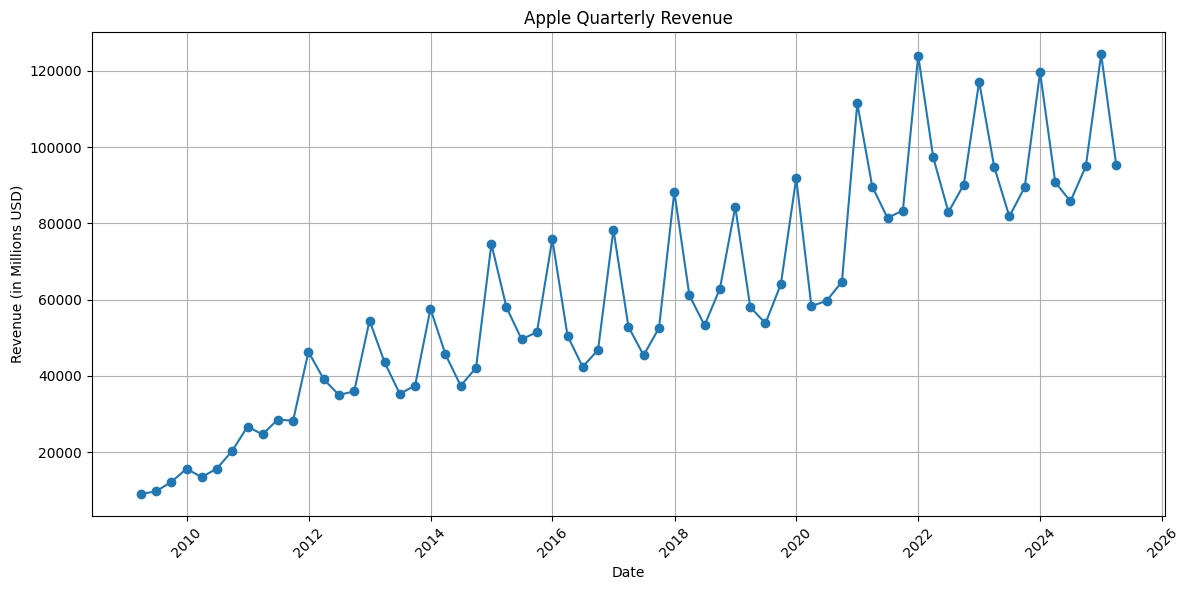

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Revenue'], marker='o')
plt.title('Apple Quarterly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (in Millions USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Export DataFrame to csv

In [24]:
df.to_csv('apple_quarterly_revenue.csv', index=False)